In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df_loan = pd.read_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\loan.csv' , low_memory = False)

In [6]:
df_loan.shape

(39717, 111)

In [7]:
# Set right column names

df_loan = df_loan.rename(columns = {c : c.replace(' ','').replace('.','_') for c in df_loan.columns})
print(df_loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [8]:
# Check potential unique value fields 
df_colunique = pd.Series({col: len(pd.unique(df_loan[col])) for col in df_loan}).reset_index()
df_colunique[df_colunique[0] == len(df_loan)]

# Remove the columns with all nulls ## potential unique 

,index,0
0,id,39717
1,member_id,39717
18,url,39717


In [9]:
# Strip all columns for leading and lagging spaces

df_loan = df_loan.applymap(lambda s : s.strip() if type(s) is str else s)

print(len(df_loan))
df_loan = df_loan[~(df_loan.loan_status == 'Current')]
print(len(df_loan))

39717
38577


In [10]:
# Remove the columns with all nulls 

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
columns_to_remove = df_loan_null[df_loan_null[0] == len(df_loan) ]

print(len(df_loan.columns))

df_loan.drop(columns_to_remove['index'] , axis = 1 , inplace = True)

df_loan.columns

111


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='o

In [11]:
print(len(df_loan.columns))

56


In [12]:
# Delete unwanted columns : less data : No action here as no column has a fully null data 

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
df_loan_null['Percent'] = df_loan_null[0] / len(df_loan) *100
df_loan_null[df_loan_null.Percent > 0].sort_values(by = 'Percent' , ascending = False).head()

,index,0,Percent
29,mths_since_last_record,35837,92.897322
28,mths_since_last_delinq,24905,64.559193
19,desc,12527,32.472717
10,emp_title,2386,6.185033
11,emp_length,1033,2.677761


In [13]:
# Delete unwanted columns :  repetition and unwanted data 

# url has no additional information 

print(df_loan[(df_loan.id.astype(str) != df_loan.url.apply(lambda s : s[s.index('=') + 1:len(s)].strip() if '=' in s else s ))])
print(df_loan.url.apply(lambda s : s[0 : s.index('=')].strip() if '=' in s else s ).unique())

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 56 columns]
['https://lendingclub.com/browse/loanDetail.action?loan_id']


In [14]:
# Remove string months from term 6 

df_loan.term = df_loan.term.apply(lambda s : s[0:s.index(' ')] if ' ' in s else s)
df_loan.term = pd.to_numeric(df_loan.term)
df_loan.term.head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [15]:
# Remove % sign from interest rate 

df_loan.int_rate = df_loan.int_rate.apply(lambda s : s[0:s.index('%')] if '%' in s else s)
df_loan.int_rate = pd.to_numeric(df_loan.int_rate)
df_loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [16]:
df_loan.emp_length.apply(lambda s : str(s).replace('years' , '').replace(' ' , '').replace('year' , '') ).head()
#df_loan.emp_length = pd.to_numeric(df_loan.emp_length)

0    10+
1     <1
2    10+
3    10+
5      3
Name: emp_length, dtype: object

In [17]:
# Delete blank rows 
# No blank rows identified worth to be deleted 

col_count = len(df_loan.columns)
df_loan[df_loan.isnull().sum(axis = 1) / col_count * 100  > 12 ]

(df_loan.isnull().sum(axis = 1)/ col_count * 100 ).max()

12.5

In [18]:
# Identify the columns with a 0 low variance and check it they can be removed 
df_var = df_loan.var().sort_values() == 0
columns_to_remove = df_var[df_var]
print(columns_to_remove.index)

if len(columns_to_remove.index) > 0 :
    df_loan.drop(columns_to_remove.index , axis = 1 , inplace = True)
    
print(len(df_loan.columns))

Index(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths',
       'acc_now_delinq', 'policy_code', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med'],
      dtype='object')
48


In [19]:
# Identify the columns with a no unique values across 
df_non_unique = pd.Series({col: len(pd.unique(df_loan[col])) for col in df_loan}).sort_values() == 1
columns_to_remove = df_non_unique[df_non_unique]
print(columns_to_remove.index)

if len(columns_to_remove.index) > 0 :
    df_loan.drop(columns_to_remove.index , axis = 1 , inplace = True)
print(len(df_loan.columns))

Index(['initial_list_status', 'application_type', 'pymnt_plan'], dtype='object')
45


In [20]:
# identify columns which have no impact on the business or which do not give additional information 

columns_to_remove = ['url' , 'collection_recovery_fee']
df_loan.drop(columns_to_remove , axis = 1 , inplace = True)
print(len(df_loan.columns))

43


In [21]:
df_loan.to_csv(r'C:\Kamal\Machine Learing and AI\Course Sessions\Statistical Inference\Exploratory Data Analysis\Case_Study_1\reduced_data_set.csv')

In [22]:
# Find missing values in the column and identify whether update is required 

# Delete unwanted columns : less data 

# Count number of nulls

df_loan_null = df_loan.isnull().sum(axis = 0).reset_index()
df_loan_null['Percent'] = df_loan_null[0] / len(df_loan) *100
df_loan_null[df_loan_null.Percent > 0].sort_values(by = 'Percent' , ascending = False).head()


(df_loan.isnull().sum(axis = 0) / len(df_loan)).sort_values(ascending = False)

mths_since_last_record    0.928973
mths_since_last_delinq    0.645592
desc                      0.324727
emp_title                 0.061850
emp_length                0.026778
pub_rec_bankruptcies      0.018068
last_pymnt_d              0.001840
revol_util                0.001296
title                     0.000285
last_credit_pull_d        0.000052
installment               0.000000
grade                     0.000000
int_rate                  0.000000
term                      0.000000
funded_amnt_inv           0.000000
funded_amnt               0.000000
loan_amnt                 0.000000
member_id                 0.000000
home_ownership            0.000000
annual_inc                0.000000
verification_status       0.000000
issue_d                   0.000000
loan_status               0.000000
sub_grade                 0.000000
addr_state                0.000000
purpose                   0.000000
zip_code                  0.000000
last_pymnt_amnt           0.000000
recoveries          

In [23]:
# Action on the columns with missing values 

# last payment date . The value is limited to loan status charged of . The business case will have to handled during analysis 
# Currently no action is taken on the same as it will not add any new information 
# No fix of values is required 

# No data filtering is required 


# Standardization of the values willbe handled as part of the univariate analysis 

In [24]:
# Perform Univariate Analysis

# Write Function to perform univariate analysis on categorical variables 

def uni_analysis_cat (x , summary = 0):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
       
    if(~summary):
        print(x.iloc[:,0].value_counts())
        sns.countplot( x = x.iloc[:,0], data = x , ax = axes[0])
        sns.countplot( x = x.iloc[:,0], hue = x.iloc[:,1] , data = x , ax = axes[1] )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        print('****************************************************************************************************')
        ctab = pd.crosstab(x.iloc[:,1] ,x.iloc[:,0] , margins = False ,\
                           margins_name = 'Total' , normalize = True).round(4) * 100
        
        # plot the heat map for the cross tab 
        fm , main = plt.subplots()
        sns.heatmap(ctab ,cmap = 'Greens' , annot = True)
        

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
****************************************************************************************************


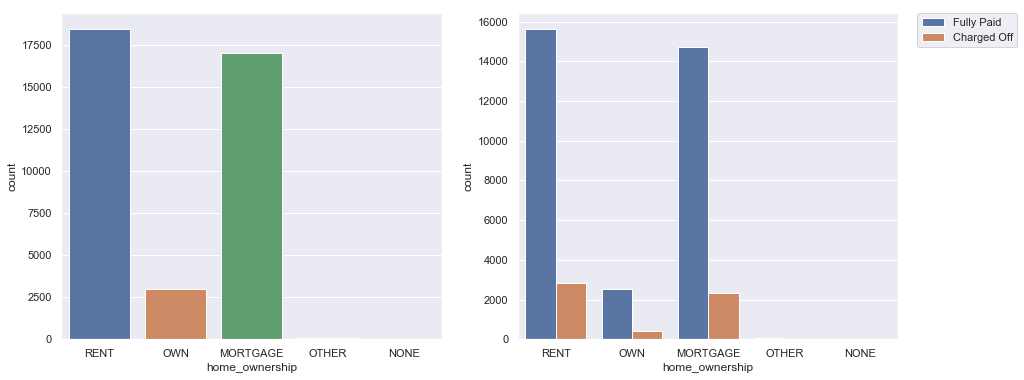

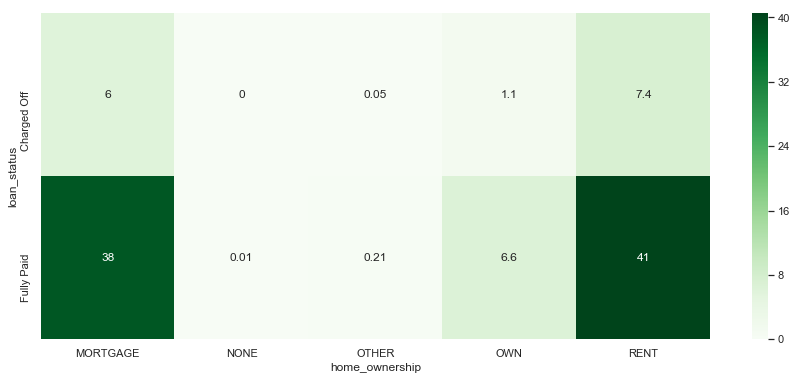

In [25]:
# Univariate analysis of Home ownership and comparison with home status

uni_analysis_cat(df_loan[['home_ownership' , 'loan_status']])

In [26]:
#uni_analysis_cat(df_loan[['inq_last_6mths' , 'loan_status']])

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


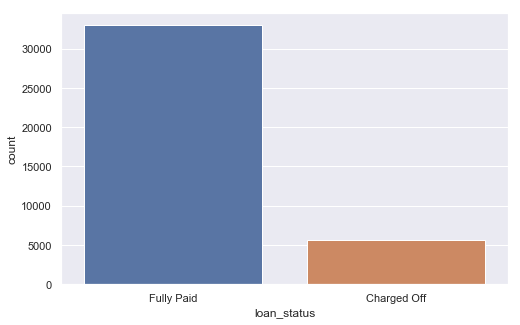

In [27]:
# Univariate analysis of Loan Status 

print(df_loan.loan_status.value_counts())

sns.set(rc={'figure.figsize':(8,5)})
sns.countplot( x = df_loan.loan_status , data = df_loan[['home_ownership' , 'loan_status']])

In [28]:
# Univariate analysis for quantitative variable 


def uni_analysis_num (x , type = 'r'):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    print('Variable =' , x.columns[0])
    print('Mean Value ', x.iloc[:,0].mean() )
    print('Median ', x.iloc[:,0].median() )
   
    print('****************************************************************************************************')
    # print(x.iloc[:,0].value_counts())
    sns.boxplot( y = x.iloc[:,0], data = x , ax = axes[0])
    sns.violinplot( x = x.iloc[:,1] , y = x.iloc[:,0] , data = x , ax = axes[1], \
                   vert = True , inner = 'quartile' ,scale_hue = True )
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #print('****************************************************************************************************')
    #print(pd.crosstab(x.iloc[:,0] ,x.iloc[:,1] , margins = True , margins_name = 'Total' , normalize = True).round(4) * 100)

Variable = installment
Mean Value  322.46631801332103
Median  277.86
****************************************************************************************************


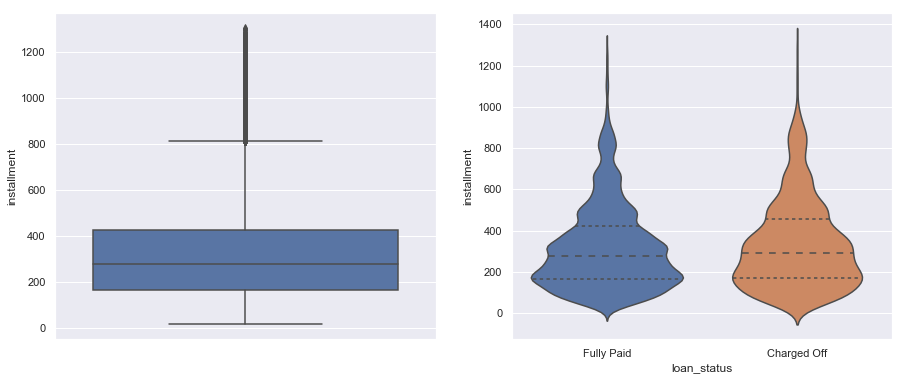

In [29]:
uni_analysis_num(df_loan[['installment' , 'loan_status']])

Variable = int_rate
Mean Value  11.932218679523526
Median  11.71
****************************************************************************************************


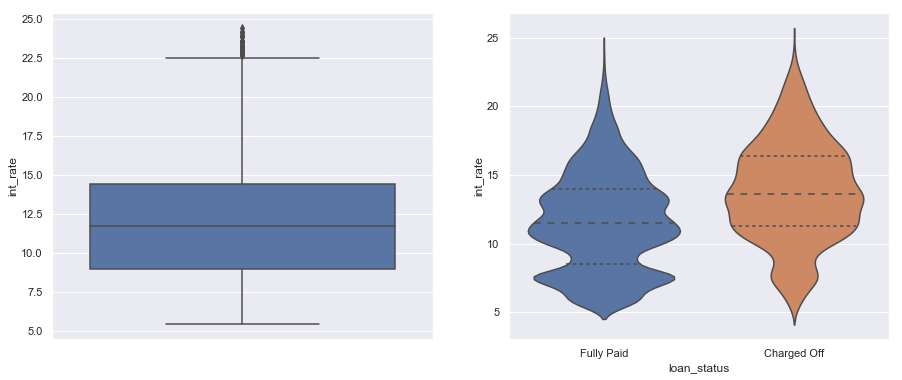

In [30]:
uni_analysis_num(df_loan[['int_rate' , 'loan_status']])

In [31]:
# In case of months , perform analysis based on both month and year 
# start with the setting the date type and then continue with the seperate analysis of Month and year 

df_loan.issue_d = pd.to_datetime(df_loan.issue_d , format = '%b-%y')

df_loan['issue_d_month'] = df_loan.issue_d.dt.month
df_loan['issue_d_year'] = df_loan.issue_d.dt.year

#Compress the data for the issue date to display the same in the consolidated form based on % 

df_issue_d = df_loan.loc[df_loan.loan_status == 'Charged Off' , ['issue_d_year' , 'issue_d_month' , 'loan_status']]\
            .groupby(['issue_d_year' , 'issue_d_month' , 'loan_status']).size().reset_index()

df_issue_d['status_percent'] = (df_issue_d[0]/sum(df_issue_d[0])).round(4)*100


12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_d_month, dtype: int64
****************************************************************************************************


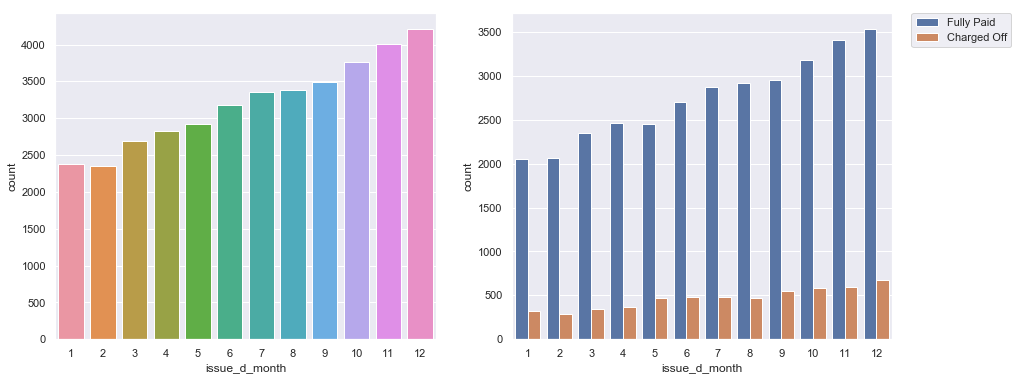

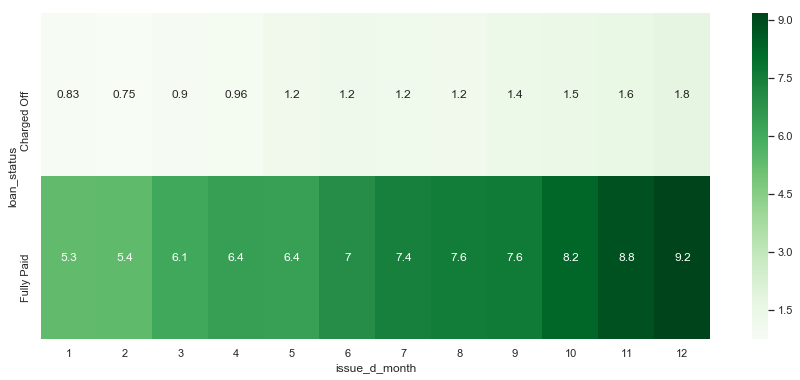

In [32]:
# Univariate analysis considering the month of the loan issue 
# Here we see that delinquency increases witht the later months when loans may have increase just to meet the target numbers

uni_analysis_cat(df_loan[['issue_d_month' , 'loan_status']] , summary = True)

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64
****************************************************************************************************


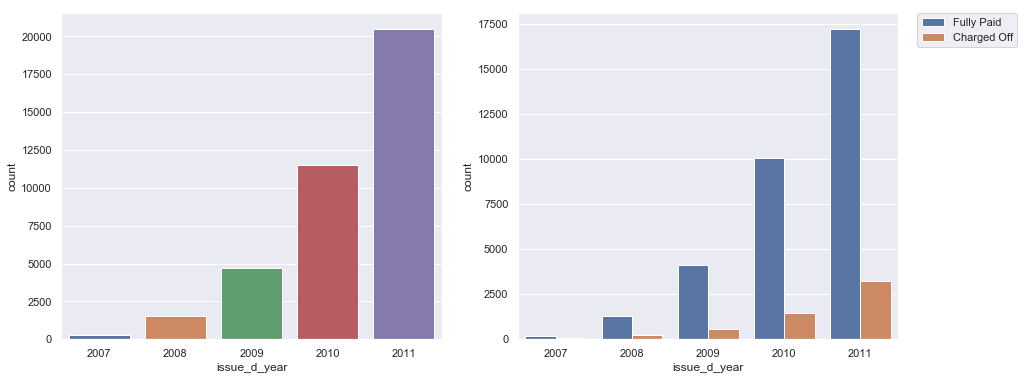

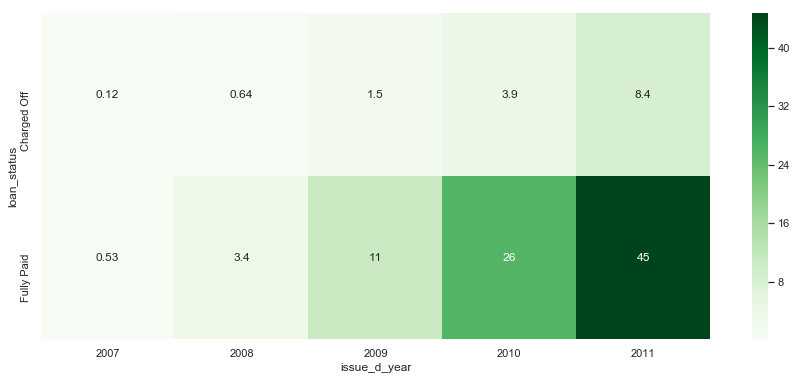

In [33]:
# Univariate analysis considering the month of the loan issue 
# Here we see that delinquency increases witht the later yeas for growth when loans may have increase just to meet the target numbers
# Year 2011 is particularly alarming 

uni_analysis_cat(df_loan[['issue_d_year' , 'loan_status']])

In [34]:
def bubble_plot(x , y , z ,percent):
    plt.rcParams.update({'font.size': 12})

    plt.figure(figsize=(10, 6))
    
    plt.scatter(x = x
                , y = y , 
                s = percent * 100,
                c = 'r',
               alpha = 0.8)

    
    for i in range(0,len(x)):
        plt.text(x[i] ,y[i], s= percent[i].round(2) , ha = 'left', va = 'center', fontsize = 12)

    plt.show()

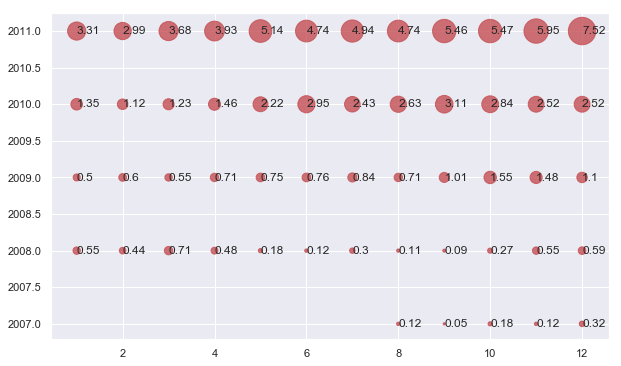

In [35]:
# Undertake the scatter plot for the charged Off variables

bubble_plot(df_issue_d.issue_d_month , df_issue_d.issue_d_year , df_issue_d.loan_status , df_issue_d.status_percent)

In [36]:
# Bivariate analysis : Common function to perform correlation within data frame 

def bi_analysis_num(df):
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(df.corr(), fmt='0.2f', annot=True , cmap = 'Greens')

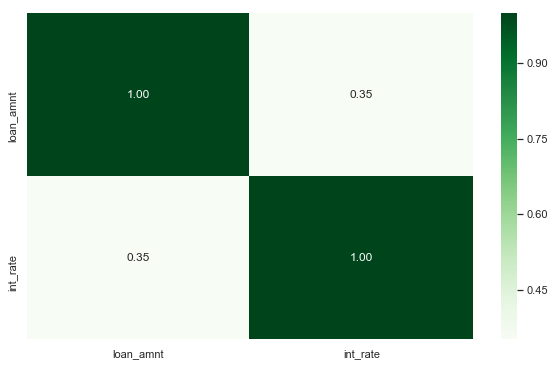

In [37]:
# Finding the correlation between the interest rate and the loan amount when the loan is charged off 

bi_analysis_num(df_loan.loc[df_loan.loan_status == 'Charged Off' ,  ['loan_amnt' , 'int_rate']])

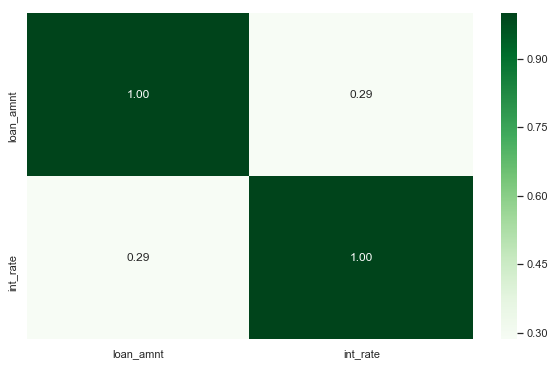

In [38]:
# Finding the correlation between the interest rate and the loan amount when the loan is Fully Paid 

bi_analysis_num(df_loan.loc[df_loan.loan_status == 'Fully Paid' ,  ['loan_amnt' , 'int_rate']])

In [39]:
# Bivariate analysis : Common function to perform correlation within data frame 

def bi_analysis_cat(df):
    sns.set(rc={'figure.figsize':(15,6)})
    f, axes = plt.subplots(1, 2)
    
    #sns.heatmap( data = df.iloc[:,[0,1]] , ax = axes[0],annot=True , cmap = 'Greens' )
    
    sns.violinplot( x = df.iloc[:,2] , y = df.iloc[:,1] ,  hue = df.iloc[:,3] , data = df , ax = axes[1], \
                   vert = True , inner = 'quartile' ,scale_hue = True , split = True )
    
    

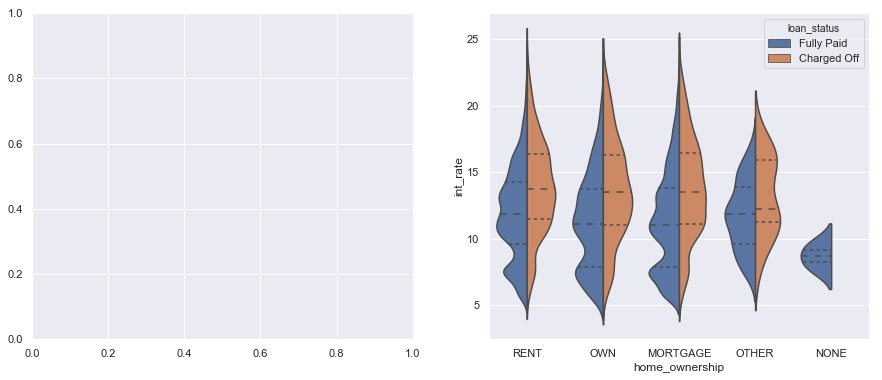

In [40]:
bi_analysis_cat(df_loan[['loan_amnt' , 'int_rate' , 'home_ownership','loan_status']])